In [1]:
organism="Bacteria"

In [2]:
'''%%bash
rm histogram*'''

'%%bash\nrm histogram*'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)
from operator import add,sub
plt.style.use('classic')
##
##*****NAMES and SELECTION BELOW
'''sec_st="helix"
selection="H"
calculation="FrNetcharge"'''
sec_sts=['helix','betasheet','coil','turns']
for sec_st in sec_sts:
    if sec_st=='helix':
        selection='H'
    elif sec_st=='betasheet':
        selection='E'
    elif sec_st=='coil':
        selection='C'
    elif sec_st=='turns':
        selection='T'
    calculations=['FrNetcharge','FrCharged','Frnonpolar','FrPolar']
    for calculation in calculations:
        ######
        col_names=['Index','Name','Structure','Length','Charged-AA','Polar-AA','Non-Polar','FrCharged','FrPositive','FrNegative',
                   'FrPolar','Frnonpolar', 'FrNetcharge','ChargedRes','NetChargeProtein']

        filename="../all_"+sec_st+".csv"
        data=pd.read_csv(filename,names =col_names,skiprows=1,skipinitialspace=True)
        #data=data[(data['Charged-AA']>0)] #& (data['Length']<=10)]  #************************************>0 , ==0 and comment for all
        names=data.loc[:,'Name']
        if calculation=="FrNetcharge":
            data=data[(data['Charged-AA']>0) & (data['Length']>0)] #(data['Charged-AA']>0) & (data['Length']>10)******Only considering for more than 0 charged residues
            chargevalue=data.loc[:,calculation]
        else:
            data=data[data['Length']>0]
            chargevalue=data.loc[:,calculation]
        totals=len(chargevalue)
        print(totals)
        #####
        if calculation=='FrNetcharge':
            n_bins1=np.arange(-1.0,1.1,0.1)
            n_bins2=np.arange(-1.0,1.1,0.1)
        elif calculation=='FrCharged':
            n_bins1=np.arange(0.0,1.1,0.1)
            n_bins2=np.arange(0,1.1,0.1)
        else:
            n_bins1=np.arange(0.0,1.1,0.1)
            n_bins2=np.arange(0,1.1,0.1)
        ##
        values=chargevalue
        meanx=np.mean(values)
        stdx=np.std(values)
        hist, bin_edges=np.histogram(values, bins=n_bins2, density=False)
        bin_width = bin_edges[2]-bin_edges[1]
        ##normalised histogram
        norm_hist=hist/len(values)
        #print(norm_hist)
        if len(values)==0:
            exit
        else:
            norm_hist=hist/len(values)
            filehistogram=open("histogramvalue"+calculation+"-All.dat","a")
            filehistogram.write(sec_st)
            filehistogram.write('\t')
            filehistogram.write(calculation)
            filehistogram.write('\t')
            startcountfornbins=0
            while startcountfornbins<len(n_bins2)-1:
                filehistogram.write('%.2f'%(norm_hist[startcountfornbins]))
                filehistogram.write('\t')
                startcountfornbins+=1
            filehistogram.write('\n')
            filehistogram.close()
            #print(norm_hist)
###
###
print("Done")

19601
20732
20732
20732
17878
28001
28001
28001
22844
52159
52159
52159
24546
36098
36098
36098
Done


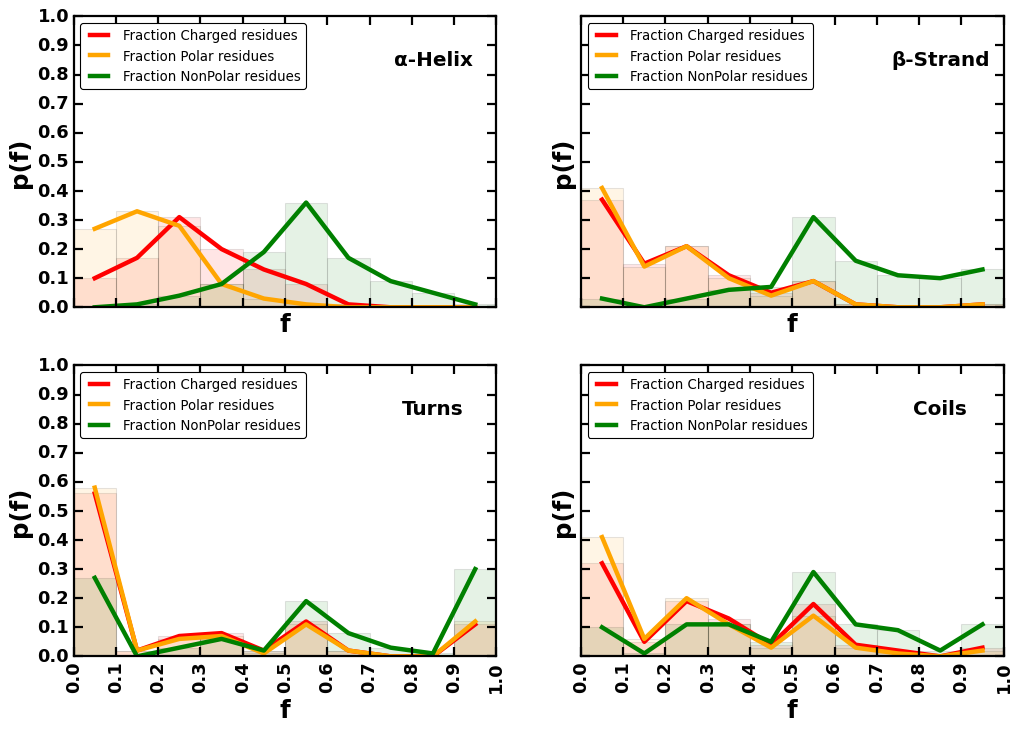

In [11]:

import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#matplotlib.use('pdf')
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)
from operator import add,sub
plt.style.use('classic')
##
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth']= 2
##
datas={}
##
file1=pd.read_csv('histogramvalueFrCharged-All.dat',delimiter="\t", header=None )
file11=pd.read_csv('histogramvalueFrCharged-All.dat',delimiter="\t", header=None )
file2=pd.read_csv('histogramvalueFrnonpolar-All.dat',delimiter="\t", header=None )
file22=pd.read_csv('histogramvalueFrnonpolar-All.dat',delimiter="\t", header=None )
file3=pd.read_csv('histogramvalueFrPolar-All.dat',delimiter="\t", header=None )
file33=pd.read_csv('histogramvalueFrPolar-All.dat',delimiter="\t", header=None )
file4=pd.read_csv('histogramvalueFrNetcharge-All.dat',delimiter="\t", header=None )
file44=pd.read_csv('histogramvalueFrNetcharge-All.dat',delimiter="\t", header=None )
datas['frcharged']={'helix':file11.iloc[0,2:12].tolist(),'betasheet':file1.iloc[1,2:12].tolist(),'coils':file1.iloc[2,2:12].tolist(), 'turns':file1.iloc[3,2:12].tolist()}
datas['frNetcharged']={'helix':file44.iloc[0,2:22].tolist(),'betasheet':file4.iloc[1,2:22].tolist(),'coils':file4.iloc[2,2:22].tolist(), 'turns':file4.iloc[3,2:22].tolist()}
datas['frPolar']={'helix':file33.iloc[0,2:12].tolist(),'betasheet':file3.iloc[1,2:12].tolist(),'coils':file3.iloc[2,2:12].tolist(), 'turns':file3.iloc[3,2:12].tolist()}
datas['frnonpolar']={'helix':file22.iloc[0,2:12].tolist(),'betasheet':file2.iloc[1,2:12].tolist(),'coils':file2.iloc[2,2:12].tolist(), 'turns':file2.iloc[3,2:12].tolist()}
##
n_bins1=np.arange(-1.0,1.0,0.1)
n_bins2=np.arange(0.0,1.0,0.1)
n_bins11 = list(map(lambda  x : x - 0.0, n_bins1))
n_bins12 = list(map(lambda  x : x + 0.05, n_bins1))
n_bins21 = list(map(lambda  x : x - 0.0, n_bins2))
n_bins22 = list(map(lambda  x : x + 0.05, n_bins2))
##
values=['frcharged','frNetcharged','frPolar','frnonpolar']
values2=['helix','betasheet','coils','turns']

'''print(n_bins2)
print(n_bins21)
print(n_bins22)
print(datas['frnonpolar']['helix'])'''

fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True, sharex='col', facecolor='white')

count = 0
for a in values2:
    if count == 0:
        annotate = "α-Helix"
    elif count == 1:
        annotate = "β-Strand"
    elif count == 2:
        annotate = "Turns"
    else:
        annotate = "Coils"
    
    ax[count // 2, count % 2].text(0.85, 0.85, 
                                   annotate,
                                   color="black",
                                   fontsize=18,
                                   fontweight='bold', 
                                   horizontalalignment='center',
                                   verticalalignment='center',
                                   transform=ax[count // 2, count % 2].transAxes)
    
    ax[count // 2, count % 2].bar(n_bins21, datas['frcharged'][a], align="edge", width=0.1, color="red", alpha=0.1)
    # ax[count // 2, count % 2].bar(n_bins11, datas['frNetcharged'][a], align="edge", width=0.1, color="blue", alpha=0.1)
    ax[count // 2, count % 2].bar(n_bins21, datas['frPolar'][a], align="edge", width=0.1, color="orange", alpha=0.1)
    ax[count // 2, count % 2].bar(n_bins21, datas['frnonpolar'][a], align="edge", width=0.1, color="green", alpha=0.1)

    ax[count // 2, count % 2].plot(n_bins22, datas['frcharged'][a], color="red", label='Fraction Charged residues', linewidth=4)
    # ax[count // 2, count % 2].plot(n_bins12, datas['frNetcharged'][a], color="blue", label='Charge Density', linewidth=4)
    ax[count // 2, count % 2].plot(n_bins22, datas['frPolar'][a], color="orange", label='Fraction Polar residues', linewidth=4)
    ax[count // 2, count % 2].plot(n_bins22, datas['frnonpolar'][a], color="green", label='Fraction NonPolar residues', linewidth=4)

    ax[count // 2, count % 2].legend(loc="upper left", fontsize=12, ncol=1, fancybox=True)
    ax[count // 2, count % 2].set_xticks(np.arange(0.0, 1.1, 0.1))
    ax[count // 2, count % 2].set_xticklabels(["{:.1f}".format(tick) for tick in ax[count // 2, count % 2].get_xticks()], rotation=90, fontsize=16, fontweight="bold")
    ax[count // 2, count % 2].set_yticks(np.arange(0, 1.10, 0.10))
    ax[count // 2, count % 2].set_yticklabels(["{:.1f}".format(tick) for tick in ax[count // 2, count % 2].get_yticks()], fontsize=16, fontweight="bold")
    ax[count // 2, count % 2].margins(x=0)
    # ax[count // 2, count % 2].grid(color='black', linestyle='--', linewidth=0.1)
    
    
   


    #ax[count // 2, count % 2].set_xticklabels(["{:.1f}".format(tick) for tick in ax[count // 2, count % 2].get_xticks()], fontweight='bold')


    #ax[count // 2, count % 2].set_yticklabels(["{:.1f}".format(tick) for tick in ax[count // 2, count % 2].get_yticks()], fontweight='bold')

    # Setting labels for x-axis and y-axis
    ax[count // 2, count % 2].set_xlabel(r'f', fontsize=22, fontweight="bold")  # Set x-label and font size
    ax[count // 2, count % 2].set_ylabel(r'p(f)', fontsize=22, fontweight="bold")  # Set y-label and font size
    
    count += 1
plt.savefig(organism + "histograms-All.png", dpi=150, bbox_inches='tight')
plt.show()


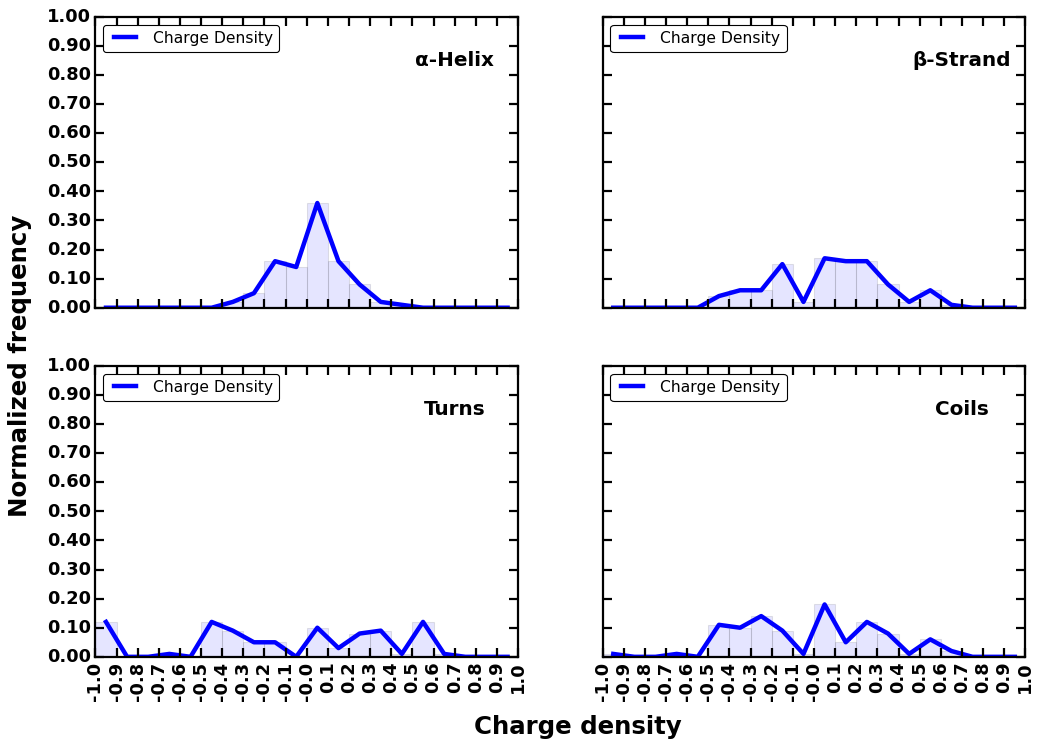

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True, sharex='col', facecolor='white')

count = 0
for a in values2:
    if count == 0:
        annotate = "α-Helix"
    elif count == 1:
        annotate = "β-Strand"
    elif count == 2:
        annotate = "Turns"
    else:
        annotate = "Coils"
    
    ax[count // 2, count % 2].text(0.85, 0.85, 
                                   annotate,
                                   color="black",
                                   fontsize=18,
                                   fontweight='bold', 
                                   horizontalalignment='center',
                                   verticalalignment='center',
                                   transform=ax[count // 2, count % 2].transAxes)
    
    
    ax[count // 2, count % 2].bar(n_bins11, datas['frNetcharged'][a], align="edge", width=0.1, color="blue", alpha=0.1)
    

    
    ax[count // 2, count % 2].plot(n_bins12, datas['frNetcharged'][a], color="blue", label='Charge Density', linewidth=4)
    

    ax[count // 2, count % 2].legend(loc="upper left", fontsize=14, ncol=1, fancybox=True)
    ax[count // 2, count % 2].set_xticks(np.arange(-1.0, 1.1, 0.1))
    ax[count // 2, count % 2].set_xticklabels(np.arange(-1.0, 1.1, 0.1), rotation=90, fontsize=16, fontweight="bold")
    ax[count // 2, count % 2].set_yticks(np.arange(0, 1.10, 0.10))
    ax[count // 2, count % 2].set_yticklabels(np.arange(0, 1.10, 0.10), fontsize=16, fontweight="bold")
    ax[count // 2, count % 2].margins(x=0)
    # ax[count // 2, count % 2].grid(color='black', linestyle='--', linewidth=0.1)
    
    
    count += 1

# Bold x-labels
for axes_row in ax:
    for axes in axes_row:
        axes.set_xticklabels(["{:.1f}".format(tick) for tick in axes.get_xticks()], fontweight='bold')

# Bold y-ticks and format y-tick labels
for axes_row in ax:
    for axes in axes_row:
        axes.set_yticklabels(["{:.2f}".format(tick) for tick in axes.get_yticks()], fontweight='bold')

# Setting labels for x-axis and y-axis
ax[1, 1].set_xlabel('Charge density', fontsize=22, fontweight="bold")  # Set x-label and font size
ax[1, 0].set_ylabel('Normalized frequency', fontsize=22, fontweight="bold")  # Set y-label and font size


ax[1, 0].yaxis.set_label_coords(-0.15, 1.0)  # Adjust the position of the y-axis label for the third subplot
ax[1, 1].xaxis.set_label_coords(-0.06, -0.2)
plt.savefig(organism + "histograms-All-chargedensity.png", dpi=150, bbox_inches='tight')
plt.show()


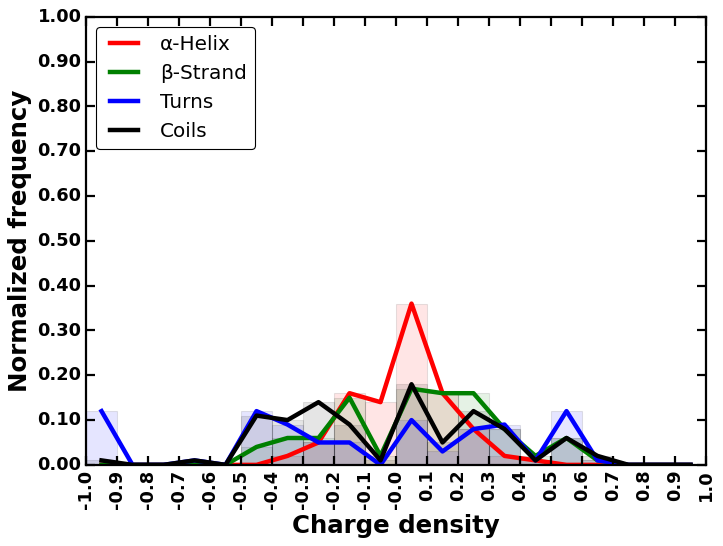

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(10, 7), sharey=True, sharex='col', facecolor='white')

colors = ['red', 'green', 'blue', 'black']
count = 0

for a in values2:
    if count == 0:
        annotate = "α-Helix"
    elif count == 1:
        annotate = "β-Strand"
    elif count == 2:
        annotate = "Turns"
    else:
        annotate = "Coils"

    ax.bar(n_bins11, datas['frNetcharged'][a], align="edge", width=0.1, color=colors[count], alpha=0.1)
    ax.plot(n_bins12, datas['frNetcharged'][a], linewidth=4,color=colors[count], label=annotate)

    count += 1

ax.legend(loc="upper left", fontsize=18, ncol=1, fancybox=True)
ax.set_xticks(np.arange(-1.0, 1.1, 0.1))
ax.set_xticklabels(np.arange(-1.0, 1.1, 0.1), rotation=90, fontsize=16, fontweight="bold")
ax.set_yticks(np.arange(0, 1.10, 0.10))
ax.set_yticklabels(["{:.2f}".format(tick) for tick in ax.get_yticks()], fontsize=16, fontweight="bold")
ax.margins(x=0)

# Setting labels for x-axis and y-axis
ax.set_xlabel('Charge density', fontsize=22, fontweight="bold")
ax.set_ylabel('Normalized frequency', fontsize=22, fontweight="bold")
ax.set_xticklabels(["{:.1f}".format(tick) for tick in ax.get_xticks()], fontsize=16, fontweight="bold")
#ax.yaxis.set_label_coords(-0.1, 1.0)  # Adjust the position of the y-axis label

plt.savefig(organism + "histograms-All-chargedensity.png", dpi=150, bbox_inches='tight')
plt.show()


# E0 and G0 code below

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)
from operator import add,sub
plt.style.use('classic')
##
##*****NAMES and SELECTION BELOW
statements=["E0","G0"]
for statement in statements:
        
    sec_sts=['helix','betasheet','coil','turns']
    for sec_st in sec_sts:
        if sec_st=='helix':
            selection='H'
        elif sec_st=='betasheet':
            selection='E'
        elif sec_st=='coil':
            selection='C'
        elif sec_st=='turns':
            selection='T'
        calculations=['FrNetcharge','FrCharged','Frnonpolar','FrPolar']
        for calculation in calculations:
            ######
            col_names=['Index','Name','Structure','Length','Charged-AA','Polar-AA','Non-Polar','FrCharged','FrPositive','FrNegative',
                       'FrPolar','Frnonpolar', 'FrNetcharge','ChargedRes','NetChargeProtein']

            filename="../all_"+sec_st+".csv"
            data=pd.read_csv(filename,names =col_names,skiprows=1,skipinitialspace=True)
            if statement=="E0":
                data=data[(data['Charged-AA']==0)] #& (data['Length']<=10)]  #************************************>0 , ==0 and comment for all
            else:
                data=data[(data['Charged-AA']>0)]
            names=data.loc[:,'Name']
            if calculation=="FrNetcharge":
                #data=data[(data['Charged-AA']>0) & (data['Length']>0)] #(data['Charged-AA']>0) & (data['Length']>10)******Only considering for more than 0 charged residues
                chargevalue=data.loc[:,calculation]
            else:
                data=data[data['Length']>0]
                chargevalue=data.loc[:,calculation]
            totals=len(chargevalue)
            print(totals)
            #####
            if calculation=='FrNetcharge':
                n_bins1=np.arange(-1.0,1.1,0.1)
                n_bins2=np.arange(-1.0,1.1,0.1)
            elif calculation=='FrCharged':
                n_bins1=np.arange(0.0,1.1,0.1)
                n_bins2=np.arange(0,1.1,0.1)
            else:
                n_bins1=np.arange(0.0,1.1,0.1)
                n_bins2=np.arange(0,1.1,0.1)
            ##
            values=chargevalue
            meanx=np.mean(values)
            stdx=np.std(values)
            hist, bin_edges=np.histogram(values, bins=n_bins2, density=False)
            bin_width = bin_edges[2]-bin_edges[1]
            ##normalised histogram
            norm_hist=hist/len(values)
            #print(norm_hist)
            if len(values)==0:
                exit
            else:
                norm_hist=hist/len(values)
                filehistogram=open("histogramvalue"+calculation+"-"+statement+".dat","a")
                filehistogram.write(sec_st)
                filehistogram.write('\t')
                filehistogram.write(calculation)
                filehistogram.write('\t')
                startcountfornbins=0
                while startcountfornbins<len(n_bins2)-1:
                    filehistogram.write('%.2f'%(norm_hist[startcountfornbins]))
                    filehistogram.write('\t')
                    startcountfornbins+=1
                filehistogram.write('\n')
                filehistogram.close()
                #print(norm_hist)
###
###
print("Done")

1131
1131
1131
1131
10123
10123
10123
10123
29315
29315
29315
29315
11552
11552
11552
11552
19601
19601
19601
19601
17878
17878
17878
17878
22844
22844
22844
22844
24546
24546
24546
24546
Done


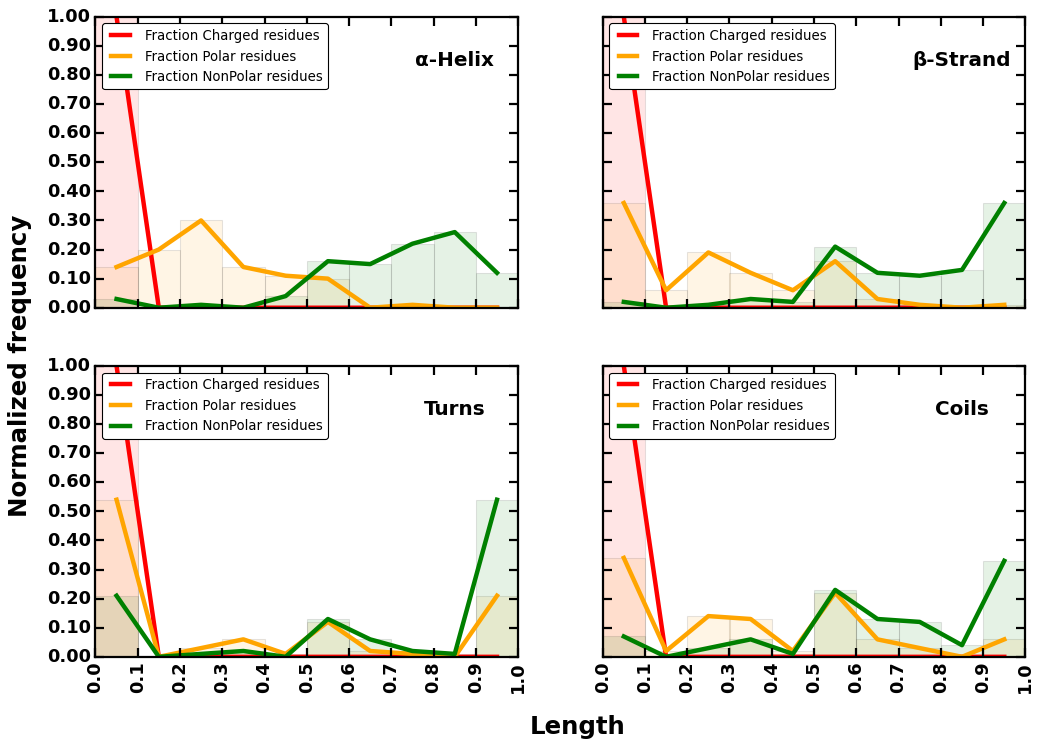

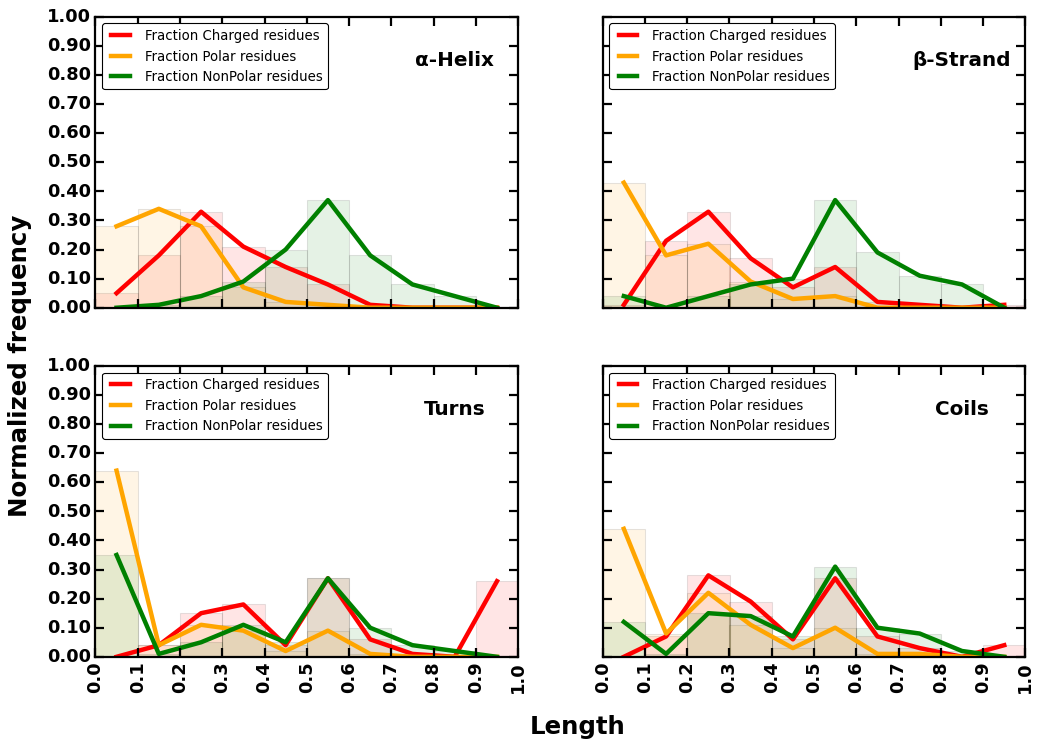

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('pdf')
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)
from operator import add,sub
plt.style.use('classic')
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth']= 2
##
setx=["E0","G0"]
for zz in setx:
    datas={}
    ##histogramvalueFrCharged-E0
    file1=pd.read_csv('histogramvalueFrCharged-'+zz+'.dat',delimiter="\t", header=None )
    file11=pd.read_csv('histogramvalueFrCharged-'+zz+'.dat',delimiter="\t", header=None )
    file2=pd.read_csv('histogramvalueFrnonpolar-'+zz+'.dat',delimiter="\t", header=None )
    file22=pd.read_csv('histogramvalueFrnonpolar-'+zz+'.dat',delimiter="\t", header=None )
    file3=pd.read_csv('histogramvalueFrPolar-'+zz+'.dat',delimiter="\t", header=None )
    file33=pd.read_csv('histogramvalueFrPolar-'+zz+'.dat',delimiter="\t", header=None )
    file4=pd.read_csv('histogramvalueFrNetcharge-'+zz+'.dat',delimiter="\t", header=None )
    file44=pd.read_csv('histogramvalueFrNetcharge-'+zz+'.dat',delimiter="\t", header=None )
    datas['frcharged']={'helix':file11.iloc[0,2:12].tolist(),'betasheet':file1.iloc[1,2:12].tolist(),'coils':file1.iloc[2,2:12].tolist(), 'turns':file1.iloc[3,2:12].tolist()}
    datas['frNetcharged']={'helix':file44.iloc[0,2:22].tolist(),'betasheet':file4.iloc[1,2:22].tolist(),'coils':file4.iloc[2,2:22].tolist(), 'turns':file4.iloc[3,2:22].tolist()}
    datas['frPolar']={'helix':file33.iloc[0,2:12].tolist(),'betasheet':file3.iloc[1,2:12].tolist(),'coils':file3.iloc[2,2:12].tolist(), 'turns':file3.iloc[3,2:12].tolist()}
    datas['frnonpolar']={'helix':file22.iloc[0,2:12].tolist(),'betasheet':file2.iloc[1,2:12].tolist(),'coils':file2.iloc[2,2:12].tolist(), 'turns':file2.iloc[3,2:12].tolist()}
    ##
    n_bins1=np.arange(-1.0,1.0,0.1)
    n_bins2=np.arange(0.0,1.0,0.1)
    n_bins11 = list(map(lambda  x : x - 0.0, n_bins1))
    n_bins12 = list(map(lambda  x : x + 0.05, n_bins1))
    n_bins21 = list(map(lambda  x : x - 0.0, n_bins2))
    n_bins22 = list(map(lambda  x : x + 0.05, n_bins2))
    ##
    values=['frcharged','frNetcharged','frPolar','frnonpolar']
    values2=['helix','betasheet','coils','turns']

    '''print(n_bins2)
    print(n_bins21)
    print(n_bins22)
    print(datas['frnonpolar']['helix'])'''
    fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True, sharex='col', facecolor='white')

    count = 0
    for a in values2:
        if count == 0:
            annotate = "α-Helix"
        elif count == 1:
            annotate = "β-Strand"
        elif count == 2:
            annotate = "Turns"
        else:
            annotate = "Coils"

        ax[count // 2, count % 2].text(0.85, 0.85, 
                                       annotate,
                                       color="black",
                                       fontsize=18,
                                       fontweight='bold', 
                                       horizontalalignment='center',
                                       verticalalignment='center',
                                       transform=ax[count // 2, count % 2].transAxes)

        ax[count // 2, count % 2].bar(n_bins21, datas['frcharged'][a], align="edge", width=0.1, color="red", alpha=0.1)
        # ax[count // 2, count % 2].bar(n_bins11, datas['frNetcharged'][a], align="edge", width=0.1, color="blue", alpha=0.1)
        ax[count // 2, count % 2].bar(n_bins21, datas['frPolar'][a], align="edge", width=0.1, color="orange", alpha=0.1)
        ax[count // 2, count % 2].bar(n_bins21, datas['frnonpolar'][a], align="edge", width=0.1, color="green", alpha=0.1)

        ax[count // 2, count % 2].plot(n_bins22, datas['frcharged'][a], color="red", label='Fraction Charged residues', linewidth=4)
        # ax[count // 2, count % 2].plot(n_bins12, datas['frNetcharged'][a], color="blue", label='Charge Density', linewidth=4)
        ax[count // 2, count % 2].plot(n_bins22, datas['frPolar'][a], color="orange", label='Fraction Polar residues', linewidth=4)
        ax[count // 2, count % 2].plot(n_bins22, datas['frnonpolar'][a], color="green", label='Fraction NonPolar residues', linewidth=4)

        ax[count // 2, count % 2].legend(loc="upper left", fontsize=12, ncol=1, fancybox=True)
        ax[count // 2, count % 2].set_xticks(np.arange(0.0, 1.1, 0.1))
        ax[count // 2, count % 2].set_xticklabels(np.arange(0.0, 1.1, 0.1), rotation=90, fontsize=16, fontweight="bold")
        ax[count // 2, count % 2].set_yticks(np.arange(0, 1.10, 0.10))
        ax[count // 2, count % 2].set_yticklabels(np.arange(0, 1.10, 0.10), fontsize=16, fontweight="bold")
        ax[count // 2, count % 2].margins(x=0)
        # ax[count // 2, count % 2].grid(color='black', linestyle='--', linewidth=0.1)


        count += 1

    # Bold x-labels
    for axes_row in ax:
        for axes in axes_row:
            axes.set_xticklabels(["{:.1f}".format(tick) for tick in axes.get_xticks()], fontweight='bold')

    # Bold y-ticks and format y-tick labels
    for axes_row in ax:
        for axes in axes_row:
            axes.set_yticklabels(["{:.2f}".format(tick) for tick in axes.get_yticks()], fontweight='bold')

    # Setting labels for x-axis and y-axis
    ax[1, 1].set_xlabel('Length', fontsize=22, fontweight="bold")  # Set x-label and font size
    ax[1, 0].set_ylabel('Normalized frequency', fontsize=22, fontweight="bold")  # Set y-label and font size


    ax[1, 0].yaxis.set_label_coords(-0.15, 1.0)  # Adjust the position of the y-axis label for the third subplot
    ax[1, 1].xaxis.set_label_coords(-0.06, -0.2)
    plt.savefig(organism+"_histograms"+zz+".png", dpi=150, bbox_inches='tight')
plt.show()

NameError: name 'my_variable' is not defined

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

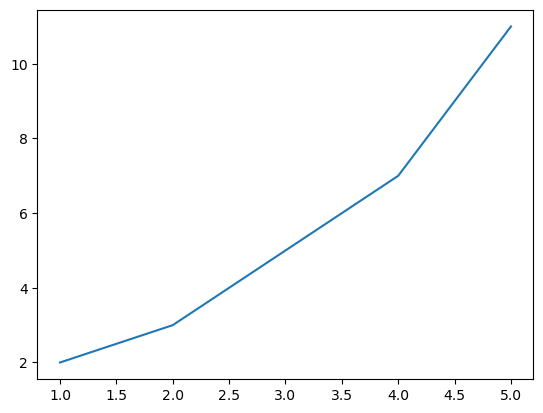

In [1]:
import matplotlib.pyplot as plt

# Set custom font properties
font = {'family': 'serif', 'serif': ['Computer Modern']}
plt.rc('font', **font)
# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x, y)
plt.ylabel(str.upper(my_variable) + " (years)" + "\n" + r"$\longleftarrow$" + r"$\it{Less}$" + " " +  r"$\it{{{}}}$".format(verb.replace(' ', r'\;')) +  
               "                       " + r"$\it{More}$" + " " + r"$\it{{{}}}$".format(verb.replace(' ', r'\;')) + r"$\longrightarrow$", fontname="Arial Bold",fontsize=14,
    fontweight="bold",labelpad=5, color="black")
plt.xlabel(r'$\mathit{\mathbf{Bold \, Italic \, Text}}$')
plt.ylabel('Y-axis Label')
plt.title('Plot with Bold Italic X-axis Label')
plt.show()
